# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.datasets import load_iris
%matplotlib inline
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import warnings
warnings.filterwarnings(action='ignore')

# EDA 
### Reading the Data.

In [2]:
df_train = pd.read_csv("/kaggle/input/predicting-pulsar-starintermediate/pulsar_data_train.csv")

df_test = pd.read_csv("/kaggle/input/predicting-pulsar-starintermediate/pulsar_data_test.csv")

In [3]:
df_train.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [4]:
df_test.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,116.906250,48.920605,0.186046,-0.129815,3.037625,17.737102,8.122621,78.813405,NaN
1,75.585938,34.386254,2.025498,8.652913,3.765050,21.897049,7.048189,55.878791,NaN
2,103.273438,46.996628,0.504295,0.821088,2.244983,15.622566,9.330498,105.134941,NaN
3,101.078125,48.587487,1.011427,1.151870,81.887960,81.464136,0.485105,-1.117904,NaN
4,113.226562,48.608804,0.291538,0.292120,6.291806,26.585056,4.540138,21.708268,NaN


* as we can see the target is NAN in the test df so it will be predected.
* we can change the name of columns to simplify.

In [5]:
df_train.columns = ['mean_profile', 'std_profile', 'kurtosis_profile', 'skewness_profile', 'mean_dmsnr',
               'std_dmsnr', 'kurtosis_dmsnr', 'skewness_dmsnr', 'target']
df_test.columns = ['mean_profile', 'std_profile', 'kurtosis_profile', 'skewness_profile', 'mean_dmsnr',
               'std_dmsnr', 'kurtosis_dmsnr', 'skewness_dmsnr', 'target']

### Data shapes 

In [6]:
df_train.shape

(12528, 9)

In [7]:
df_test.shape

(5370, 9)

### Data informations and describtion

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mean_profile      12528 non-null  float64
 1   std_profile       12528 non-null  float64
 2   kurtosis_profile  10793 non-null  float64
 3   skewness_profile  12528 non-null  float64
 4   mean_dmsnr        12528 non-null  float64
 5   std_dmsnr         11350 non-null  float64
 6   kurtosis_dmsnr    12528 non-null  float64
 7   skewness_dmsnr    11903 non-null  float64
 8   target            12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5370 entries, 0 to 5369
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mean_profile      5370 non-null   float64
 1   std_profile       5370 non-null   float64
 2   kurtosis_profile  4603 non-null   float64
 3   skewness_profile  5370 non-null   float64
 4   mean_dmsnr        5370 non-null   float64
 5   std_dmsnr         4846 non-null   float64
 6   kurtosis_dmsnr    5370 non-null   float64
 7   skewness_dmsnr    5126 non-null   float64
 8   target            0 non-null      float64
dtypes: float64(9)
memory usage: 377.7 KB


there are NAN in "kurtosis_profile" , "std_dmsnr" , "skewness_dmsnr"

In [10]:
df_train.describe()

,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr,std_dmsnr,kurtosis_dmsnr,skewness_dmsnr,target
count,12528.000000,12528.000000,10793.000000,12528.000000,12528.000000,11350.000000,12528.000000,11903.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.351318,8.333489,105.525779,0.092034
std,25.672828,6.801077,1.064708,6.208450,29.613230,19.610842,4.535783,107.399585,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.024652,-0.188142,1.910535,14.404353,5.803063,35.199899,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.473125,0.932374,5.413253,28.337418,10.727927,139.997850,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


In [11]:
df_test.describe()

,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr,std_dmsnr,kurtosis_dmsnr,skewness_dmsnr,target
count,5370.000000,5370.000000,4603.000000,5370.000000,5370.000000,4846.000000,5370.000000,5126.000000,0.0
mean,111.168917,46.615074,0.483676,1.751260,12.473587,26.425371,8.233724,102.869088,NaN
std,25.608635,6.940638,1.076893,6.072820,29.145134,19.384489,4.435683,104.748418,NaN
min,6.179688,24.791612,-1.876011,-1.764717,0.213211,7.370432,-2.721857,-1.964998,NaN
25%,101.041016,42.408020,0.030643,-0.189557,1.956522,14.555826,5.700461,33.817330,NaN
50%,114.757812,47.031304,0.227314,0.186468,2.830686,18.549670,8.383695,81.392046,NaN
75%,127.023438,51.133444,0.475056,0.918807,5.590301,28.681787,10.632265,136.893502,NaN
max,192.617188,98.778911,7.608370,65.385974,223.392141,109.712649,34.539844,1191.000837,NaN


In [12]:
df_train['target'].value_counts()

0.0    11375
1.0     1153
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

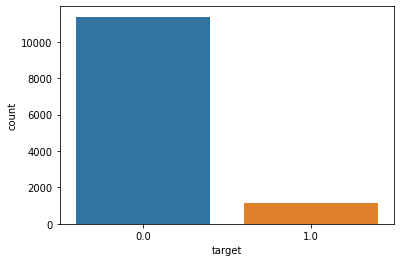

In [13]:
sns.countplot(df_train.target)

<AxesSubplot:>

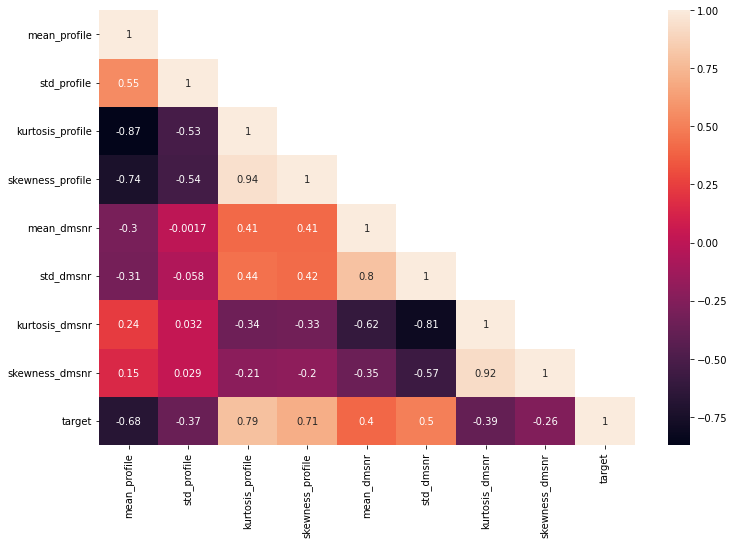

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap( df_train.corr(), annot = True ,mask=np.triu(df_train.corr(),+1))

In [15]:
df_train.columns

Index(['mean_profile', 'std_profile', 'kurtosis_profile', 'skewness_profile',
       'mean_dmsnr', 'std_dmsnr', 'kurtosis_dmsnr', 'skewness_dmsnr',
       'target'],
      dtype='object')

#### Correlations between two independent variables

There is Highly positively correlated:

* skewness_profile and kurtosis_dmsnr
* skewness_dmsnr and kurtosis_dmsnr
* mean_dmsnr and std_dmsnr

There is Highly negatively correlated:

* mean_profile and kurtosis_profile
* mean_profile and skewness_profile
* kurtosis_dmsnr and std_dmsnr

#### Correlations between independent and dependent variable

* kurtosis_profile and skewness_profile have a high positive correlation with target .
* mean_profile has high negative correlation with target.

### Distribution of Data

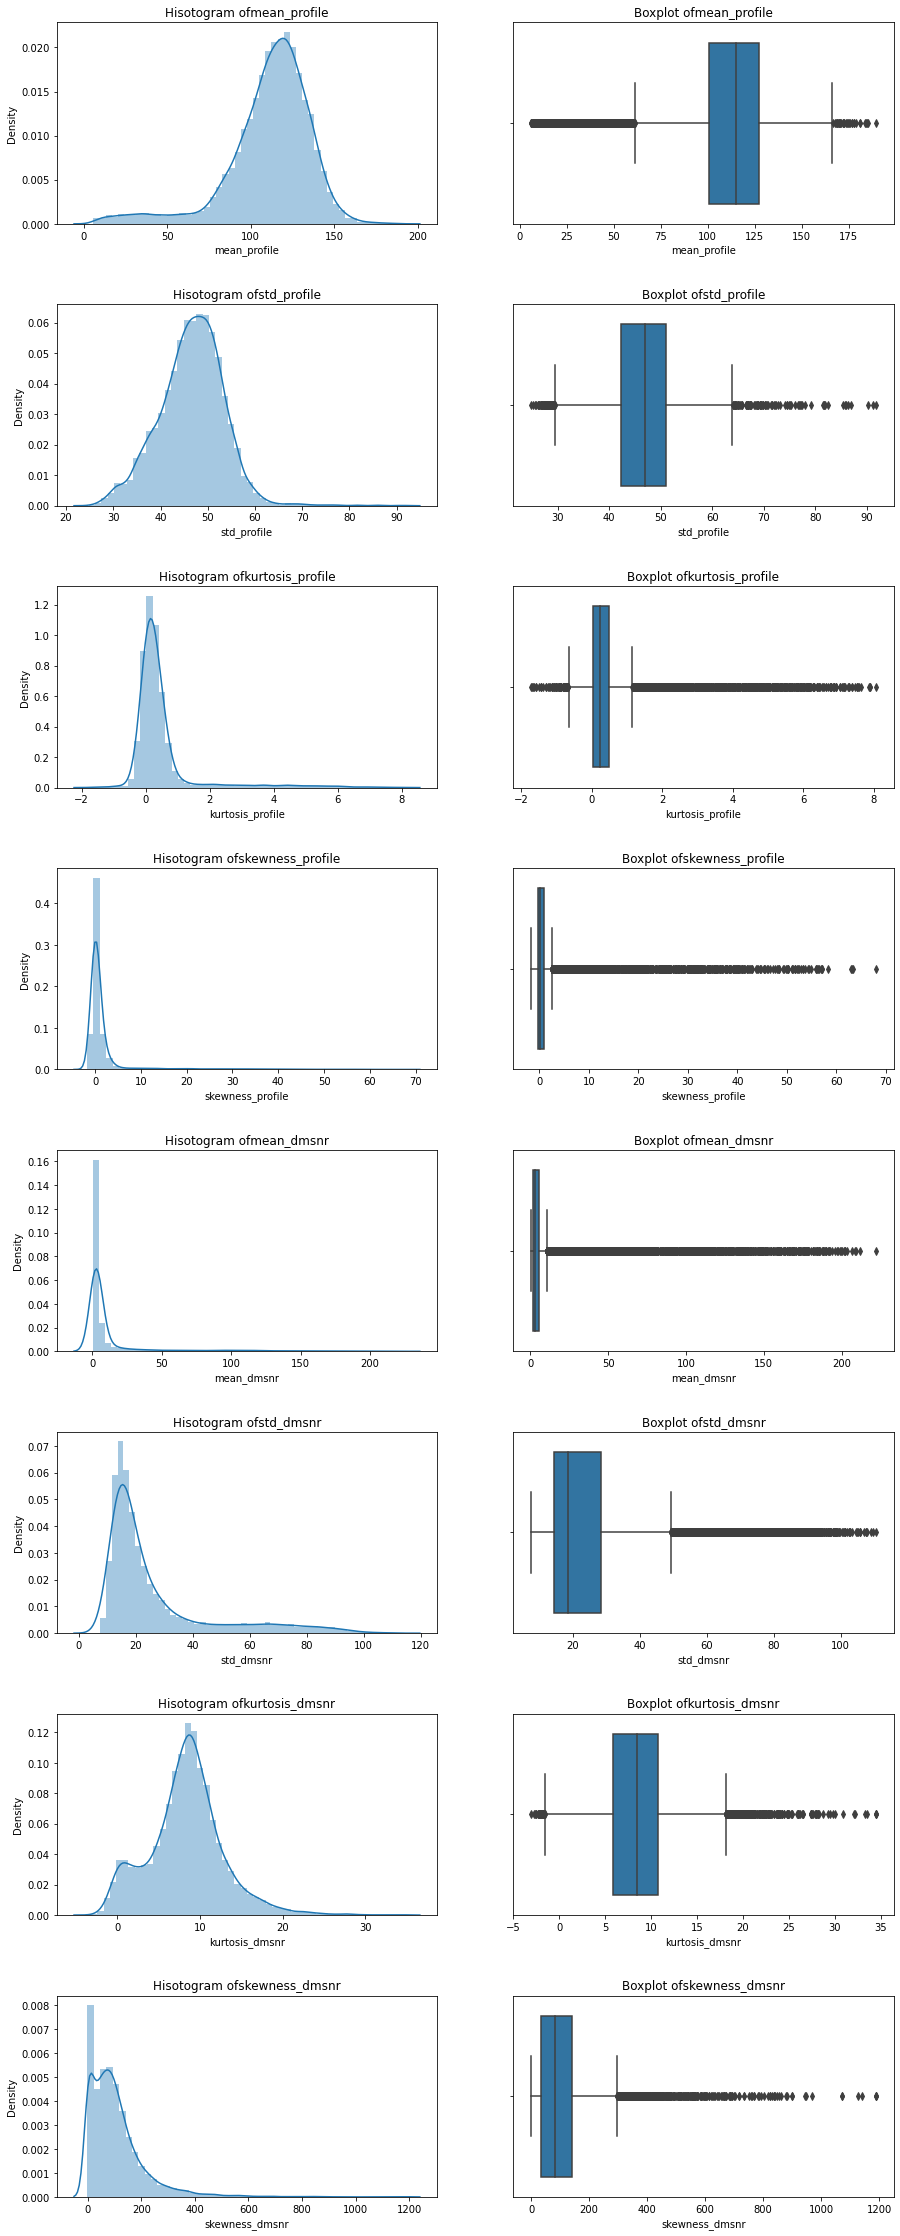

In [16]:
fig, axes = plt.subplots(nrows=8,ncols=2,  figsize=(15, 40))
fig.subplots_adjust(hspace = .4, wspace=.2)
for i in range(0,len(df_train.columns)-1):
    sns.distplot(df_train[df_train.columns[i]], ax=axes[i][0]).set_title("Hisotogram of" + df_train.columns[i])
    sns.boxplot(df_train[df_train.columns[i]], ax=axes[i][1]).set_title("Boxplot of" + df_train.columns[i])

##### as we can see the data is not normally distributed. 

# Data preprocessing

### Dealing with missing data

In [17]:
df_train.isnull().sum()

mean_profile           0
std_profile            0
kurtosis_profile    1735
skewness_profile       0
mean_dmsnr             0
std_dmsnr           1178
kurtosis_dmsnr         0
skewness_dmsnr       625
target                 0
dtype: int64

In [18]:
df_train_copy = df_train.copy()

In [19]:
fill_list = df_train['kurtosis_profile']
df_train['kurtosis_profile'] = df_train['kurtosis_profile'].fillna(pd.Series(np.random.choice(fill_list , size = len(df_train.index))))
fill_list = df_train['std_dmsnr']
df_train['std_dmsnr'] = df_train['std_dmsnr'].fillna(pd.Series(np.random.choice(fill_list , size = len(df_train.index))))
fill_list = df_train['skewness_dmsnr']
df_train['skewness_dmsnr'] = df_train['skewness_dmsnr'].fillna(pd.Series(np.random.choice(fill_list , size = len(df_train.index))))

In [20]:
df_train.isnull().sum()

mean_profile          0
std_profile           0
kurtosis_profile    244
skewness_profile      0
mean_dmsnr            0
std_dmsnr           109
kurtosis_dmsnr        0
skewness_dmsnr       30
target                0
dtype: int64

In [21]:
df_train.dropna(inplace=True)

In [22]:
df_train.isnull().sum()

mean_profile        0
std_profile         0
kurtosis_profile    0
skewness_profile    0
mean_dmsnr          0
std_dmsnr           0
kurtosis_dmsnr      0
skewness_dmsnr      0
target              0
dtype: int64

In [23]:
df_train.describe()

,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr,std_dmsnr,kurtosis_dmsnr,skewness_dmsnr,target
count,12149.000000,12149.000000,12149.000000,12149.000000,12149.000000,12149.000000,12149.000000,12149.000000,12149.000000
mean,111.057357,46.525255,0.483031,1.778405,12.719273,26.379299,8.320956,105.681697,0.091695
std,25.671800,6.790011,1.074461,6.226109,29.689592,19.680378,4.537205,107.618544,0.288606
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.921875,42.362328,0.024982,-0.188870,1.913880,14.392332,5.786106,34.779827,0.000000
50%,115.140625,46.932379,0.224197,0.203875,2.795151,18.404455,8.439768,83.229201,0.000000
75%,127.109375,50.984255,0.473620,0.934925,5.450669,28.332757,10.720199,140.358896,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


In [24]:
df_train_copy.describe()

,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr,std_dmsnr,kurtosis_dmsnr,skewness_dmsnr,target
count,12528.000000,12528.000000,10793.000000,12528.000000,12528.000000,11350.000000,12528.000000,11903.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.351318,8.333489,105.525779,0.092034
std,25.672828,6.801077,1.064708,6.208450,29.613230,19.610842,4.535783,107.399585,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.024652,-0.188142,1.910535,14.404353,5.803063,35.199899,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.473125,0.932374,5.413253,28.337418,10.727927,139.997850,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


We can see that the mean and standard deviation values in the treated dataframe is close to the values in original dataframe. So we can consider this method for missing value treatment.

### Dealing with Duplicate

In [25]:
df_train.duplicated().sum()

0

there is no duplicated data

### Dealing with Outliers

mean_profile           AxesSubplot(0.125,0.657941;0.227941x0.222059)
std_profile         AxesSubplot(0.398529,0.657941;0.227941x0.222059)
kurtosis_profile    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
skewness_profile       AxesSubplot(0.125,0.391471;0.227941x0.222059)
mean_dmsnr          AxesSubplot(0.398529,0.391471;0.227941x0.222059)
std_dmsnr           AxesSubplot(0.672059,0.391471;0.227941x0.222059)
kurtosis_dmsnr            AxesSubplot(0.125,0.125;0.227941x0.222059)
skewness_dmsnr         AxesSubplot(0.398529,0.125;0.227941x0.222059)
target                 AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

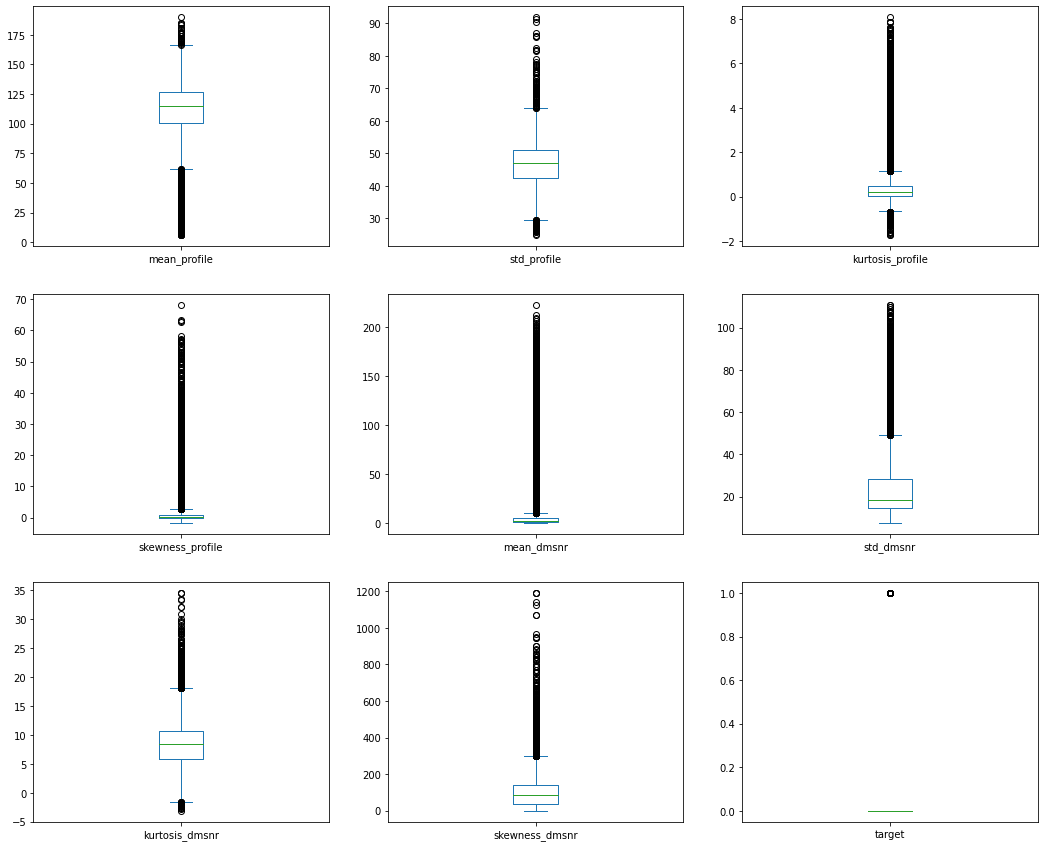

In [26]:
df_train.plot(kind = "box" , subplots = True , figsize = (18,15) ,  layout = (3,3))

In [27]:
df_train_outl = df_train.copy()
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

for column in df_train_outl.loc[:,:'skewness_dmsnr'].columns:
    if 1==1:
        lr,ur=remove_outlier(df_train_outl[column])
        df_train_outl[column]=np.where(df_train_outl[column]>ur,ur,df_train_outl[column])
        df_train_outl[column]=np.where(df_train_outl[column]<lr,lr,df_train_outl[column])

<AxesSubplot:title={'center':'Without Outliers'}>

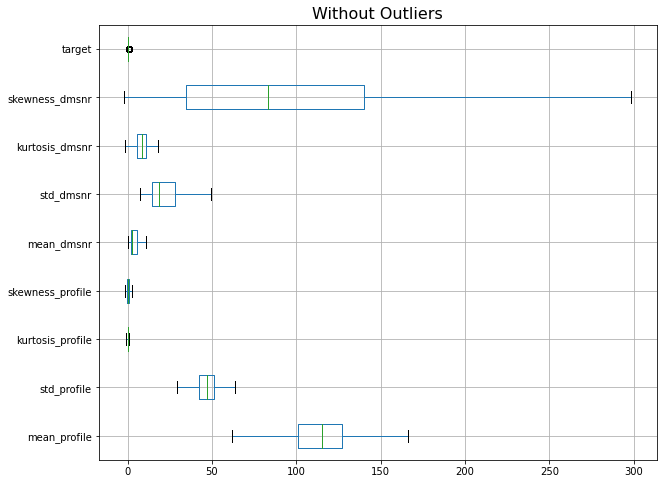

In [28]:
plt.figure(figsize=(10,8))
plt.title('Without Outliers',fontsize=16)
df_train_outl.boxplot(vert=0)

In [29]:
df_train_outl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12149 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mean_profile      12149 non-null  float64
 1   std_profile       12149 non-null  float64
 2   kurtosis_profile  12149 non-null  float64
 3   skewness_profile  12149 non-null  float64
 4   mean_dmsnr        12149 non-null  float64
 5   std_dmsnr         12149 non-null  float64
 6   kurtosis_dmsnr    12149 non-null  float64
 7   skewness_dmsnr    12149 non-null  float64
 8   target            12149 non-null  float64
dtypes: float64(9)
memory usage: 949.1 KB


# Modeling

### Split the data

In [30]:
X = df_train_outl.drop('target',axis=1)
y = df_train_outl[['target']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [31]:
# Scaling the data

ss=StandardScaler() 
X_trains = ss.fit_transform(X_train)
X_tests = ss.transform(X_test)

## Bulid the model

In [32]:
SVM = svm.SVC(random_state=1).fit(X_trains, y_train)

### For rbf kernal

In [33]:
SVM_param_grid = {'C': [0.01,0.1, 1, 10],  
              'gamma': [0.09, 0.1, 0.2, 0.001], 
              'kernel': ['rbf'],
              'tol':[0.001,0.0001],
              'degree':[2,3]}

SVM_grid1 = GridSearchCV(SVM, param_grid = SVM_param_grid, cv = 5, n_jobs=-1)

In [34]:
SVM_grid1.fit(X_trains, y_train) 

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/con

GridSearchCV(cv=5, estimator=SVC(random_state=1), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'degree': [2, 3],
                         'gamma': [0.09, 0.1, 0.2, 0.001], 'kernel': ['rbf'],
                         'tol': [0.001, 0.0001]})

In [35]:
SVM_grid1.best_estimator_

SVC(C=10, degree=2, gamma=0.1, random_state=1)

In [36]:
SVM_grid = svm.SVC(C=10,degree=2, gamma=0.09, kernel='rbf', random_state=1)
SVM_grid.fit(X_trains, y_train)

SVC(C=10, degree=2, gamma=0.09, random_state=1)

In [37]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, SVM_grid.predict(X_trains)),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, SVM_grid.predict(X_tests)),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      7727
         1.0       0.93      0.84      0.88       777

    accuracy                           0.98      8504
   macro avg       0.96      0.92      0.94      8504
weighted avg       0.98      0.98      0.98      8504
 

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      3308
         1.0       0.92      0.83      0.87       337

    accuracy                           0.98      3645
   macro avg       0.95      0.91      0.93      3645
weighted avg       0.98      0.98      0.98      3645
 



In [38]:
y_pred = SVM_grid.predict(X_tests)
print( "SVM best accuracy : " + str(np.round(metrics.accuracy_score(y_test,y_pred),3)))

SVM best accuracy : 0.978


In [39]:
print("Precision Score : ",precision_score(y_test, y_pred, pos_label='positive',average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, pos_label='positive',average='micro'))

Precision Score :  0.9777777777777777
Recall Score :  0.9777777777777777


### For Linear kernal

In [40]:
SVM_grid = svm.SVC(C=10,degree=2, gamma=0.09, kernel='linear', random_state=1)
SVM_grid.fit(X_trains, y_train)

SVC(C=10, degree=2, gamma=0.09, kernel='linear', random_state=1)

In [41]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, SVM_grid.predict(X_trains)),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, SVM_grid.predict(X_tests)),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      7727
         1.0       0.91      0.81      0.86       777

    accuracy                           0.98      8504
   macro avg       0.94      0.90      0.92      8504
weighted avg       0.97      0.98      0.97      8504
 

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      3308
         1.0       0.89      0.81      0.85       337

    accuracy                           0.97      3645
   macro avg       0.94      0.90      0.92      3645
weighted avg       0.97      0.97      0.97      3645
 



In [42]:
y_pred = SVM_grid.predict(X_tests)
print( "SVM best accuracy : " + str(np.round(metrics.accuracy_score(y_test,y_pred),3)))

SVM best accuracy : 0.973


In [43]:
print("Precision Score : ",precision_score(y_test, y_pred, pos_label='positive',average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, pos_label='positive',average='micro'))

Precision Score :  0.9733882030178327
Recall Score :  0.9733882030178327


## Find The ROC curve 

In [44]:
cutoff_grid = np.linspace(0.0,1.0,100)
TPR = []                                                 
FPR = []                                                

In [45]:
FPR, TPR, cutoffs = metrics.roc_curve(y_test,y_pred,pos_label=1)      # positive label = 1.


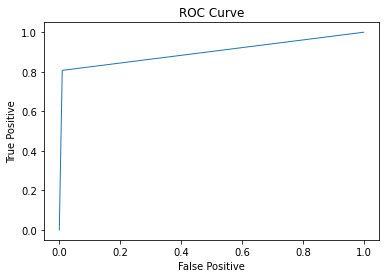

In [46]:
# Visualize.
plt.plot(FPR,TPR,linewidth=1.0)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.show()